# libraries


In [44]:
%matplotlib inline


import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
#import matplotlib.mlab as mlab
import matplotlib



from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12,8)


#  Data Frame


In [45]:
#read csv file
df=pd.read_csv('movies.csv')
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

# Data processing

In [46]:
df.shape


(7668, 15)

In [47]:
# Data Types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [48]:
# We need to see if we have any missing data
print(df.isna().sum())


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [49]:
#replace the nan value to 0
import numpy as np

df['budget'] = df['budget'].replace(np.nan, 0)
df['votes'] = df['votes'].replace(np.nan, 0)
df['gross'] = df['gross'].replace(np.nan, 0)

In [50]:
df["gross"]

0       4.699877e+07
1       5.885311e+07
2       5.383751e+08
3       8.345354e+07
4       3.984634e+07
5       3.975460e+07
6       1.152299e+08
7       2.340243e+07
8       1.081857e+08
9       1.579519e+07
10      7.068734e+07
11      3.003178e+07
12      4.982304e+07
13      5.476692e+07
14      3.189900e+07
15      9.709597e+06
16      2.120283e+07
17      1.033007e+08
18      2.144878e+07
19      1.013000e+08
20      1.981452e+07
21      3.484523e+06
22      1.664780e+07
23      2.276257e+07
24      4.691829e+07
25      1.985389e+07
26      3.432625e+07
27      0.000000e+00
28      3.712171e+07
29      2.274367e+07
30      2.248295e+07
31      1.479624e+07
32      6.613263e+07
33      5.348160e+05
34      4.399592e+07
35      6.984735e+07
36      1.000000e+07
37      6.342668e+06
38      2.711800e+07
39      6.718279e+07
40      5.000000e+06
41      0.000000e+00
42      7.063886e+06
43      6.659377e+06
44      8.415112e+06
45      4.167519e+07
46      1.571683e+07
47      0.000

In [51]:
#change data type :
df["budget"]=df["budget"].astype(int)
df["votes"]=df["votes"].astype(int)
df["gross"]=df["gross"].astype(int)

In [52]:
#change sign in gross col
df["gross"]=df["gross"].astype("string")
df["gross"]=df["gross"].str.replace('-',' ')
df["gross"]


0          46998772
1          58853106
2         538375067
3          83453539
4          39846344
5          39754601
6         115229890
7          23402427
8         108185706
9          15795189
10         70687344
11         30031783
12         49823037
13         54766923
14         31899000
15          9709597
16         21202829
17        103300686
18         21448782
19        101300000
20         19814523
21          3484523
22         16647800
23         22762571
24         46918287
25         19853892
26         34326249
27                0
28         37121708
29         22743674
30         22482952
31         14796236
32         66132626
33           534816
34         43995918
35         69847348
36         10000000
37          6342668
38         27118000
39         67182787
40          5000000
41                0
42          7063886
43          6659377
44          8415112
45         41675194
46         15716828
47                0
48         14662035
49                0


In [53]:
df["gross"]=df["gross"].astype("int64") 


In [54]:
##change data type :
#df["released"]=df["released"].astype("string")
df=df.sort_values("gross",ascending=False)


In [55]:
df["released"].sort_values()


201                              1981 (United States)
312                                      1982 (Japan)
786                                     1985 (Taiwan)
800                              1985 (United States)
1173                             1987 (United States)
1825                                    1990 (Canada)
1820                             1990 (United States)
2816                                      1995 (Iran)
6413                             2013 (United States)
4187                             2019 (United States)
442                     April 1, 1983 (United States)
389                     April 1, 1983 (United States)
1337                    April 1, 1988 (United States)
1343                    April 1, 1988 (United States)
2528                    April 1, 1994 (United States)
2333                    April 1, 1994 (United States)
4824                    April 1, 2005 (United States)
4650                    April 1, 2005 (United States)
5886                    Apri

In [56]:
#split the col to creat new year
df["the real year"]=df["released"].str.split(",",expand=True)[1]
df["the real year"]=df["the real year"].str.split("(",expand=True)[0]


In [57]:
#order df col
df=df.loc[:,["budget","company","country","director","genre","gross","name","rating","released","runtime","score","star","votes","writer","the real year","year"]]


In [58]:
# print all df
pd.set_option("display.max_rows",None)


In [59]:
#value count for company 
df["company"].value_counts()

Universal Pictures                                                 377
Warner Bros.                                                       334
Columbia Pictures                                                  332
Paramount Pictures                                                 320
Twentieth Century Fox                                              240
New Line Cinema                                                    174
Touchstone Pictures                                                132
Metro-Goldwyn-Mayer (MGM)                                          125
Walt Disney Pictures                                               123
TriStar Pictures                                                    94
Dreamworks Pictures                                                 76
Miramax                                                             74
Fox 2000 Pictures                                                   63
Orion Pictures                                                      60
Summit

In [60]:
#value count for genre 
df["genre"].value_counts()

Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Sport           1
Music           1
History         1
Name: genre, dtype: int64

# Data analyzing



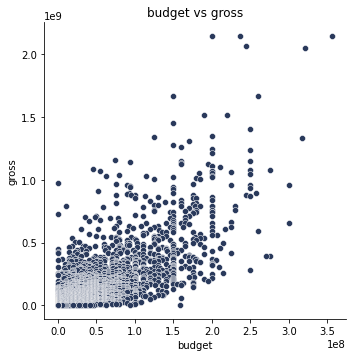

In [61]:
sns.relplot(x="budget",y="gross",data=df)
color=["#29395B"]
sns.set_palette(color)
plt.title("budget vs gross")
plt.show()

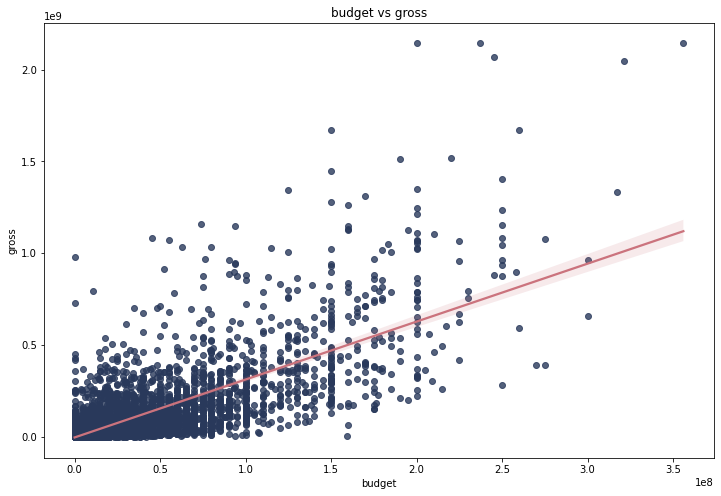

In [62]:
#budget vs gross
sns.regplot(x="budget",y="gross",data=df , scatter_kws={"color":"#29395B"},line_kws={"color":"#CB737D"})
plt.title("budget vs gross")
plt.show() 


In [63]:
df.corr()

budget     gross   runtime     score     votes      year
budget   1.000000  0.754893  0.269510  0.055665  0.486931  0.309212
gross    0.754893  1.000000  0.245376  0.187530  0.637045  0.264977
runtime  0.269510  0.245376  1.000000  0.399451  0.309122  0.120811
score    0.055665  0.187530  0.399451  1.000000  0.409182  0.097995
votes    0.486931  0.637045  0.309122  0.409182  1.000000  0.222427
year     0.309212  0.264977  0.120811  0.097995  0.222427  1.000000

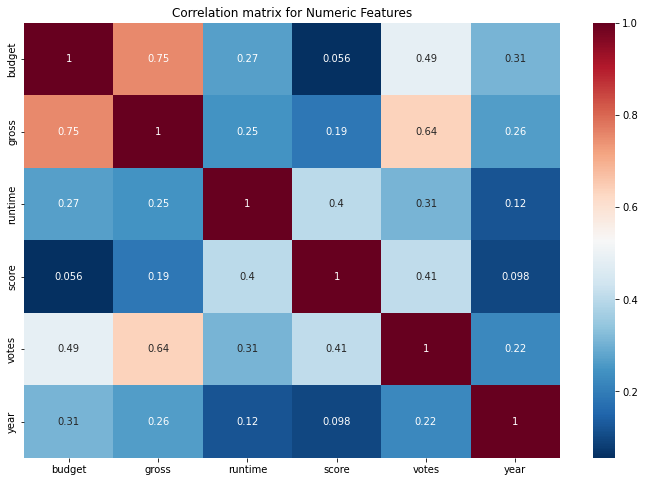

In [64]:
correlation = df.corr()
sns.heatmap(correlation, annot = True,cmap="RdBu_r")
plt.title("Correlation matrix for Numeric Features")
plt.show()

In [96]:
df_numerized = df
for col_name in df_numerized.columns :
   if ( df_numerized [col_name] .dtype=='object') :
    df_numerized[col_name]=df_numerized[col_name].astype("category")
    df_numerized[col_name]=df_numerized[col_name].cat.codes
df_numerized        

budget  company  country  director  genre       gross  name  rating  \
3045  200000000     2253       55      1155      6  2147483648  6896       5   
7445  356000000     1606       55       162      0  2147483648   535       5   
5445  237000000     2253       55      1155      0  2147483648   533       5   
6663  245000000     1540       55      1125      0  2069521700  5144       5   
7244  321000000     1606       55       162      0  2048359754   536       5   
7480  260000000     2316       55      1455      2  1670727580  6194       4   
6653  150000000     2281       55       517      0  1670516444  2969       5   
6043  220000000     1606       55      1517      0  1518815515  5502       5   
6646  190000000     2281       55      1189      0  1515341399  2145       5   
7494  150000000     2315       55       432      2  1450026933  2131       4   
6644  250000000     1606       55      1517      0  1402809540   534       5   
7247  200000000     1606       55      2457      0  1347597973   791       5   
5845  125000000     2319       54       679      1  1342321665  2407       5   
7075  317000000     2316       55      2282      0  1332698830  5145       5   
7271  170000000     2281       55      1121      0  1310466296  2970       5   
6262  150000000     2315       55       432      2  1281508100  2130       4   
7072  160000000     1592       55       250      7  1264434525   657       4   
7281  200000000     2316       55       303      2  1244639527  2760       4   
7055  250000000     2281        8       835      0  1236005118  5833       5   
6244  200000000     1606       55      2543      0  1214811252  2823       5   
6688   74000000     1313       55      1639      2  1159444662  3622       4   
6846  250000000     1606       55       162      0  1153337496  1056       5   
7250  160000000     2319       55      1189      0  1148485886   474       5   
4245   94000000     1713       34      2193      0  1146030912  6221       5   
7458  160000000      731       55      1463      0  1131927996  5084       5   
7456  160000000     2316       55       147      0  1128462972  1061       5   
5878  195000000     1812       55      1886      0  1123794079  6968       5   
6059  200000000     1637       54      2476      0  1108569499  4951       5   
6494  210000000     1812       55      1886      0  1104054072  6967       5   
2448   45000000     2316       55      2415      2  1083720877  6194       1   
6047  250000000     2319       54       483      0  1081142612  5726       5   
7463  275000000     2316       55      1125      0  1078232589  5141       5   
7450   55000000     2319       55      2767      5  1074427370  2930       6   
7488  200000000     1856       55      1509      2  1073394593  6949       1   
5685  200000000     2316       55      1678      2  1066970811  6948       1   
4852  225000000     2316       55       996      0  1066179747  4258       5   
6869  200000000     1540       55       912      0  1056057720  4616       5   
7481  183000000     2316       54      1031      1  1050693953   290       4   
5860  250000000     2316       55      2341      0  1045713802  4261       5   
7140   80000000     1313       55      1639      2  1034800131  1552       4   
2245   63000000     2281       55      2660      0  1033928303  2967       5   
6908  200000000     1856       55       124      2  1028570942  1978       4   
3451  115000000     1540       55       963      0  1027082707  5138       4   
5667  200000000     2316       55      2745      1  1025468216   300       4   
6863  150000000     2316       55       362      2  1024121104  7504       4   
6045  180000000     1637       34      2193      1  1017003568  6001       5   
3843  125000000     2319       54       435      1  1006968171  2412       4   
5243  185000000     2319       55       483      0  1005973645  5725       5   
5652          0     2319       54       679      1   977043483  2406       5   
6311   76

In [97]:
#df_numerized.corr()


In [98]:
corr_df=df_numerized.corr()
correlation_2=corr_df.unstack()
correlation_2

budget         budget           1.000000
               company          0.186474
               country          0.131720
               director         0.004976
               genre           -0.334021
               gross            0.754893
               name             0.020548
               rating          -0.081939
               released         0.009145
               runtime          0.269510
               score            0.055665
               star            -0.019952
               votes            0.486931
               writer          -0.025911
               the real year    0.302266
company        budget           0.186474
               company          1.000000
               country          0.095548
               director         0.004404
               genre           -0.071067
               gross            0.158509
               name             0.009211
               rating          -0.032943
               released        -0.010474
               r

In [99]:
sort=correlation_2.sort_values()
sort

budget         genre           -0.334021
genre          budget          -0.334021
gross          genre           -0.236812
genre          gross           -0.236812
votes          genre           -0.145296
genre          votes           -0.145296
country        score           -0.133348
score          country         -0.133348
rating         gross           -0.096924
gross          rating          -0.096924
the real year  genre           -0.082070
genre          the real year   -0.082070
rating         budget          -0.081939
budget         rating          -0.081939
runtime        country         -0.078412
country        runtime         -0.078412
               the real year   -0.074166
the real year  country         -0.074166
genre          company         -0.071067
company        genre           -0.071067
genre          runtime         -0.052711
runtime        genre           -0.052711
genre          country         -0.037615
country        genre           -0.037615
rating         c

In [100]:
sort[(sort)>0.5]

votes          gross            0.637045
gross          votes            0.637045
               budget           0.754893
budget         gross            0.754893
               budget           1.000000
rating         rating           1.000000
votes          votes            1.000000
star           star             1.000000
score          score            1.000000
runtime        runtime          1.000000
released       released         1.000000
name           name             1.000000
gross          gross            1.000000
genre          genre            1.000000
director       director         1.000000
country        country          1.000000
company        company          1.000000
writer         writer           1.000000
the real year  the real year    1.000000
dtype: float64

In [101]:

df["the real year"] = df["the real year"].replace(np.nan, 0)
df["the real year"]=df["the real year"].astype(int)
df["the real year"]


3045    17
7445    39
5445    29
6663    35
7244    38
7480    39
6653    35
6043    32
6646    35
7494    39
6644    35
7247    38
5845    31
7075    37
7271    38
6262    33
7072    37
7281    38
7055    37
6244    33
6688    35
6846    36
7250    38
4245    23
7458    39
7456    39
5878    31
6059    32
6494    34
2448    14
6047    32
7463    39
7450    39
7488    39
5685    30
4852    26
6869    36
7481    39
5860    31
7140    37
2245    13
6908    36
3451    19
5667    30
6863    36
6045    32
3843    21
5243    28
5652    30
6311    33
6905    36
7051    37
6455    34
5060    27
6253    33
4048    22
5051    27
4259    23
5451    29
4476    24
7246    38
3845    21
4643    25
5057    27
5539    29
6665    35
7047    37
4047    22
6143    32
6948    36
6870    36
4658    25
6274    33
7049    37
6657    35
7254    38
7043    37
5643    30
5468    29
6055    32
4043    22
7062    37
2844    16
6877    36
5097    27
7058    37
7467    39
4448    24
7068    37
209      2
7253    38

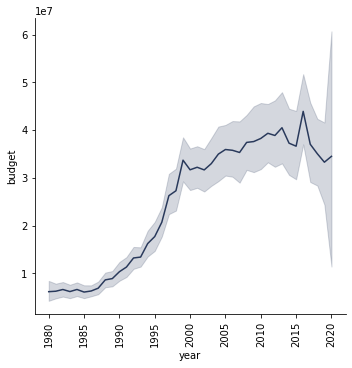

In [43]:
sns.relplot(x="year",y="budget",data=df,kind="line")
plt.xticks(rotation=90)
plt.show()